## Matricule & noms : 

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 2 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les différences fondamentales entre Python et Matlab. Ne passez pas forcement par les étapes d'installation.
</div>

Ce travail pratique a pour objet de vous permettre de vous familiariser avec la manipulation de  représentations  fréquentielles  discrètes  des  images.  Il  vous  donnera  également l’occasion de mettre en œuvre certains traitements vus en cours et de les comparer avec leur équivalent dans le domaine spatial. Trois points seront abordés:
<b>
1. La représentation fréquentielle
2. Le rehaussement dans le domaine de fourier
3. Le détramage par réjection de fréquences
</b>

Les données à utiliser pour effectuer ce travail pratique se trouvent dans l’archive <I>TP2.zip</I> disponible sur le site web du cours. 

<b>Pondération</b> 
-  Représentation fréquentielle : 4 pts 
-  Rehaussement dans le domaine de Fourier: 7 pts 
-  Détramage par réjection de fréquences : 7 pts 
-  Qualités de la langue et du rapport : 2 pts 
-  <b>Total : 20 points</b> 

<b>Date de remise</b>  
- Groupe 1: 13 mars 23h59  
- Groupe 2: 20 mars 23h59  

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions extérieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appelées ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appelés ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import cv2
import numpy as np
from pylab import ginput
from scipy import signal
import matplotlib
from scipy.ndimage import convolve

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

##  1. Représentation fréquentielle (4 pts)

Représenter  et  interpréter  correctement  une  image  dans  le  domaine  fréquentiel  est  un 
préalable indispensable à tout traitement dans ce domaine. Cette question vous permettra 
de vous familiariser avec la représentation spectrale des images. 

### 1.1. Indexation des axes fréquentiels (2 pts)

<div class="alert alert-block alert-warning">




Chargez l’image <I>Voiture.tif</I> et représentez-la dans le domaine spectral (<I>fft2</I>) selon 
la convention usuelle (fréquence nulle au voisinage du centre de l’image). Indexez les axes 
en fréquences réduites (comprises entre −1/2 et 1/2).

<b>Note</b> :
Par convention, la fonction <I>fft2</I> de numpy ordonne les fréquences de 0 &rarr; N/2, puis de –N/2 + 1 &rarr; -1 pour chaque dimension de la matrice transformée. On pourra utiliser la fonction <I>fftshift</I> de numpy pour placer la fréquence nulle au centre de l’image. Consulter l’aide de cette fonction pour plus de détails (<I>doc [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)</I>). Vous pouvez appeler la fonction comme suit: 
    
 <code>np.fft.fft2</code>  <code>np.fft.fftshift</code>

Pour augmenter le contraste de la fft, il est possible de normaliser en faisant 1 + log(FFT) pour mieux discerner les intensités.
</div>

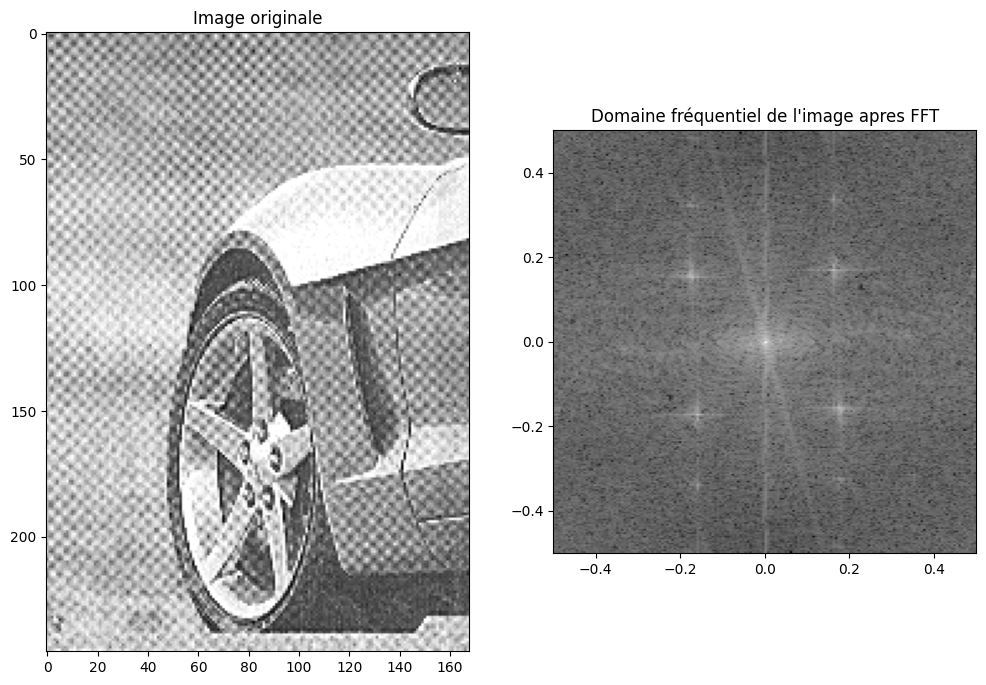

In [2]:
# Inscrivez votre code ici


voitureIm = imread('Voiture.tif')
plt.subplot(1,2,1)
plt.imshow(voitureIm, cmap = 'gray')
plt.title('Image originale')


voitureImFFT = np.fft.fft2(voitureIm) #FFT de l'image
voitureImFFT = np.fft.fftshift(voitureImFFT) #Centrage de la fréquence nulle

voitureImFFTLog = abs(1+np.log(voitureImFFT)) #Pour qu'on puisse voir les valeurs dans le domaine frequentiel
plt.subplot(1,2,2)
plt.imshow(voitureImFFTLog, cmap = 'gray', extent = (-0.5, 0.5, -0.5, 0.5)) #Intervalle de frequence
plt.title('Domaine fréquentiel de l\'image apres FFT')
plt.show()


<div class="alert alert-block alert-warning">

Donnez, en fréquences réduites puis en nombres de pixels, les coordonnées des 9 « points brillants » dont l’amplitude est la plus grande. Vous pouvez utiliser la function `ginput` qui vous permettra de cliquer sur les points les plus brillants de l'image pour en retirer les coordonnées.</div>

In [3]:
# Inscrivez votre code ici
# Ceci sera nécessaire pour utiliser ginput dans le jupyter notebook
#matplotlib.use('TkAgg')
#plt.imshow(voitureImFFT, cmap = 'gray')
#x = matplotlib.pyplot.ginput(voitureImFFT)
#print(x)
coordonnee =  [(83.28739095864202, 123.31216653798728),
 (109.65091208702563, 81.357315710022),
 (54.08908261215268, 84.47558164993833),
 (53.52212516853152, 43.654645709215345),
 (110.78482697426793, 39.96942232567787),
 (56.356912386637276, 165.55049608776315),
 (113.05265674875255, 161.2983152606045),
 (56.64039110844786, 205.80447458486498), (118.3751611224878, 203.80447458486498)]
#print(coordonnee)

#Pour les fréquences réduites :

#matplotlib.use('TkAgg')
#plt.imshow(voitureImFFT, cmap = 'gray', extent = (-0.5, 0.5, -0.5,0.5))
#x = matplotlib.pyplot.ginput(voitureImFFT)
#plt.show()


<div class="alert alert-block alert-success"> 
Les coordonnées des 9 points lumineux sont sont : 
 [(83.28739095864202, 123.31216653798728),
 (109.65091208702563, 81.357315710022),
 (54.08908261215268, 84.47558164993833),
 (53.52212516853152, 43.654645709215345),
 (110.78482697426793, 39.96942232567787),
 (56.356912386637276, 165.55049608776315),
 (113.05265674875255, 161.2983152606045),
 (56.64039110844786, 205.80447458486498), (118.3751611224878, 203.80447458486498)] <br>
 
 Les coordonnées des 9 points lumineux en fréquences réduites sont : 

### 1.2. Effet de la parité des dimensions sur l’image (2 pts)
<div class="alert alert-block alert-warning">


Appliquez la fonction <I>ifftshift</I> à la représentation fréquentielle de l’image obtenue  à  la  question  précédente,  puis  prenez-en  la  transformée  de  Fourier  inverse (<I>ifft2</I>). L'image contiendra des nombres complexes. Pour obtenir les intensités, il faut appliquer <I>np.real</I> pour conserver seulement les nombres réels.  Comparez  le  résultat  à  l’image  de  départ. Vous pouvez appeler la fonction comme suit: 
<code>np.fft.ifftshift</code>   <code>np.fft.ifft2</code>  <code>np.real</code>  </div>


[[154. 135. 151. ... 190. 174. 118.]
 [148.  75.  65. ... 204. 134. 130.]
 [179. 126. 127. ... 143. 138. 148.]
 ...
 [215. 249. 198. ... 159. 188. 191.]
 [212. 180. 190. ... 191. 153. 183.]
 [210. 185. 201. ... 196. 132. 209.]]


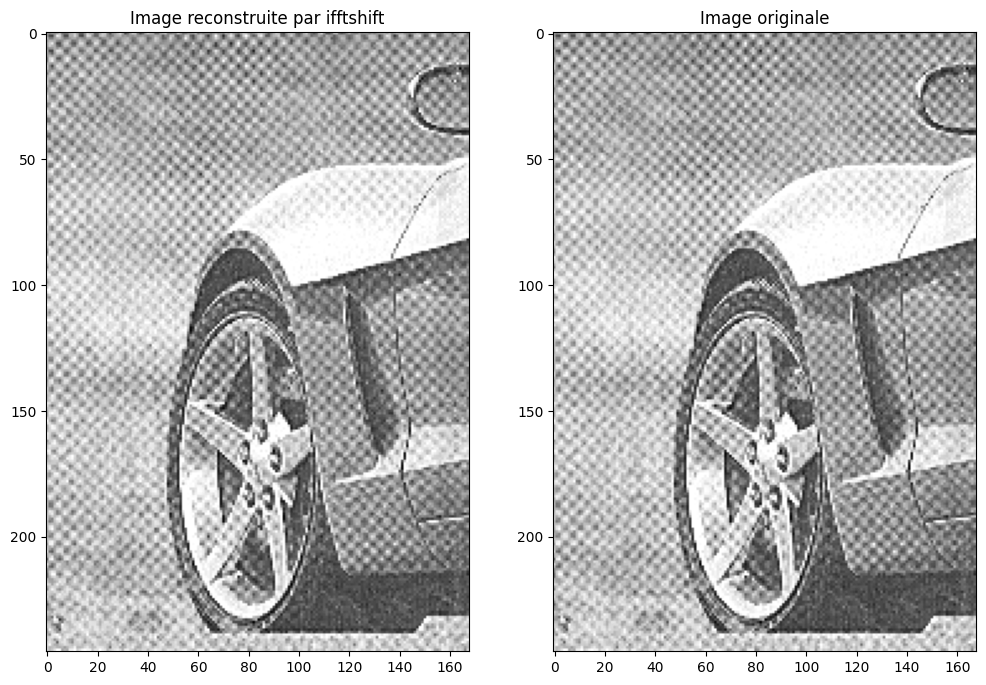

In [19]:
# Inscrivez votre code ici
# Garder cette ligne une fois que vous n'utilisez plus ginput
%matplotlib inline

#On veut reconstruite l'image originale par une ifftshift

voitureIM_Reconstruite_ifftshift = np.fft.ifftshift(voitureImFFT) #Décentralise la fréquence nulle
voitureIM_Reconstruite_ifftshift = np.fft.ifft2(voitureIM_Reconstruite_ifftshift)# Transformée de Fourier inverse

imReconstruite_ifftshift_reel = np.real(voitureIM_Reconstruite_ifftshift) #On conserve seulement les nombre réels

print(imReconstruite_ifftshift_reel)

plt.subplot(1,2,1)
plt.imshow(imReconstruite_ifftshift_reel, cmap = 'gray')
plt.title('Image reconstruite par ifftshift')


plt.subplot(1,2,2)
plt.imshow(voitureIm, cmap = 'gray')
plt.title('Image originale')
plt.show()


#En comparant cette image à celle originale, on observe que l'on obtient une image identique à celle initiale lorsqu'on utilise 
#l'inverse de la transformee de Fourier

<div class="alert alert-block alert-warning">
Appliquez  maintenant  la  fonction 
<I>fftshift</I>  (plutôt  que  <I>ifftshift</I>)  de  numpy  à  la  représentation  fréquentielle  de 
l’image obtenue à la question précédente, puis prenez-en la transformée de Fourier inverse. 
Comparez le résultat à l’image de départ.</div>

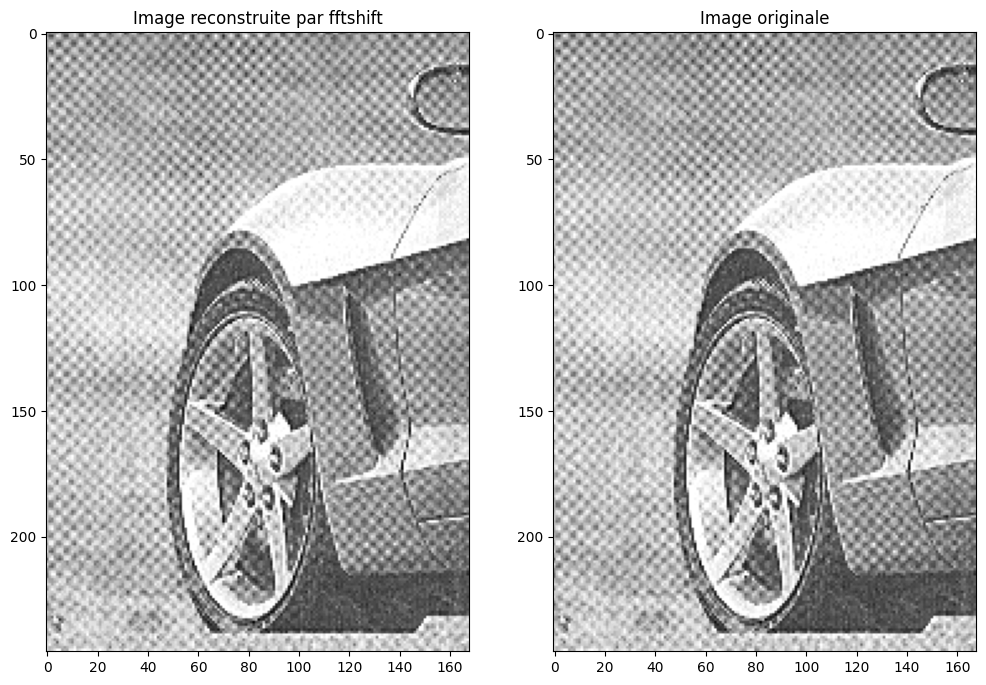

In [22]:
# Inscrivez votre code ici

#On veut reconstruite l'image précédente (Q1.2) par une fftshift

voiture_imReconsrtuite_fftshift = np.fft.fft2(imReconstruite_ifftshift_reel) #la FFT de l'image reconsrtuite à la question précédente
voiture_imReconsrtuite_fftshift = np.fft.fftshift(voiture_imReconsrtuite_fftshift) #centralise la fréquence nul
voiture_imReconsrtuite_fftshift = np.fft.fftshift(voiture_imReconsrtuite_fftshift)
voiture_imReconsrtuite_fftshift = np.fft.ifft2(voiture_imReconsrtuite_fftshift) #la transformé inverse

imReconsrtuite_fftshift_reel = np.real(voiture_imReconsrtuite_fftshift) #on prend les valeurs réels


plt.subplot(1,2,1)
plt.imshow(imReconsrtuite_fftshift_reel, cmap = 'gray')
plt.title('Image reconstruite par fftshift')


plt.subplot(1,2,2)
plt.imshow(voitureIm, cmap = 'gray')
plt.title('Image originale')
plt.show()


<div class="alert alert-block alert-warning">
- Que constatez-vous ? 
</div>

<div class="alert alert-block alert-success"> 
Étant donné que les dimensions des deux images sont pairs, on ne retrouve pas de différences entre un fftshift et un ifftshift
</div>

<div class="alert alert-block alert-warning">


Supprimez une ligne et une colonne de l’image <I>Voiture.tif</I> et effectuez de nouveau les  opérations  décrites  dans  le  paragraphe précédent.

Vous pouvez vous aider de la function ```numpy.delete(arr, obj, axis=None)``` </div>

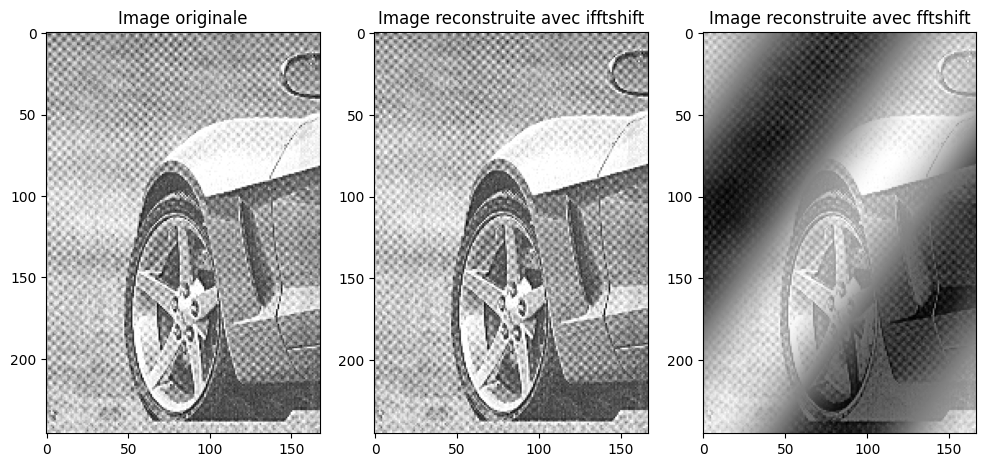

In [21]:
# Inscrivez votre code ici
voitureDelete = np.delete(np.delete(voitureIm, 5, 0),5,1) #on supprime une ligne et colonne de l'image originale

#on applique ici les mêmes lignes de code qu'aux questions précédentes, mais sur une image ayant une ligne et colonne de suprimées

voitureImFFTD = np.fft.fft2(voitureDelete)
voitureImFFTD_nul = np.fft.fftshift(voitureImFFTD)
voitureImIFFTD_ifftshift = np.fft.ifftshift(voitureImFFTD_nul)
voitureIMIFFT2D = np.fft.ifft2(voitureImIFFTD_ifftshift)
nombreD = np.real(voitureIMIFFT2D)

nombreFFTD = np.fft.fft2(nombreD)
nombreFFTD = np.fft.fftshift(nombreFFTD)
nombreFFTD = np.fft.fftshift(nombreFFTD)
nombreFFT2D = np.fft.ifft2(nombreFFTD)
nombreFinalD = np.real(nombreFFT2D)

plt.subplot(1,3,1)
plt.imshow(voitureIm, cmap = 'gray')
plt.title('Image originale')

plt.subplot(1,3,2)
plt.imshow(nombreD, cmap = 'gray')
plt.title('Image reconstruite avec ifftshift')

plt.subplot(1,3,3)
plt.imshow(nombreFinalD, cmap = 'gray')
plt.title('Image reconstruite avec fftshift')
plt.show()




<div class="alert alert-block alert-warning">
- Que constatez-vous maintenant? Expliquez  </div>

<div class="alert alert-block alert-success"> 
On observe maintenant une différence entre ces deux images. En effet, l'image qui est reconstruite par fftshift est déformée étant donné que les dimensions de l'images sont passées de paire à impaire, donc les fréquences sont décalées, causant une mauvaise intérprétation de l'image originale.
</div>

## 2. Rehaussement dans le domaine de Fourier (7 pts)
### 2.1. Rehaussement par masquage flou (3 pts) 

<div class="alert alert-block alert-warning">

Chargez l’image <b><I>Lune2.tif</I></b> et mettez en œuvre un rehaussement par masquage flou dans le domaine de Fourier (voir section 3.2 du TP1 pour un rappel sur le rehaussement par masquage flou. Formule: G = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ]). Pour cela, utilisez un filtre Butterworth ou gaussian passe-bas, puis faites varier la fréquence de coupure et le coefficient de masquage. Utilisez les fonctions fournies:```filtpb_gaus``` et ```filtpg_butter```.</div>

In [7]:
def filtpb_gauss(A, fc):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    """
    M, N = A.shape

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B      


In [8]:
def filtpb_butter(A, fc, ordre):
    """ Application d'un filtre Butterworth sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    ordre (int): Ordre du filtre
    """
    M,N=A.shape

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # Réponse fréquentielle du filtre Butterworth
    HH = 1 / (1 + (D2 / fc**2)**ordre)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B 

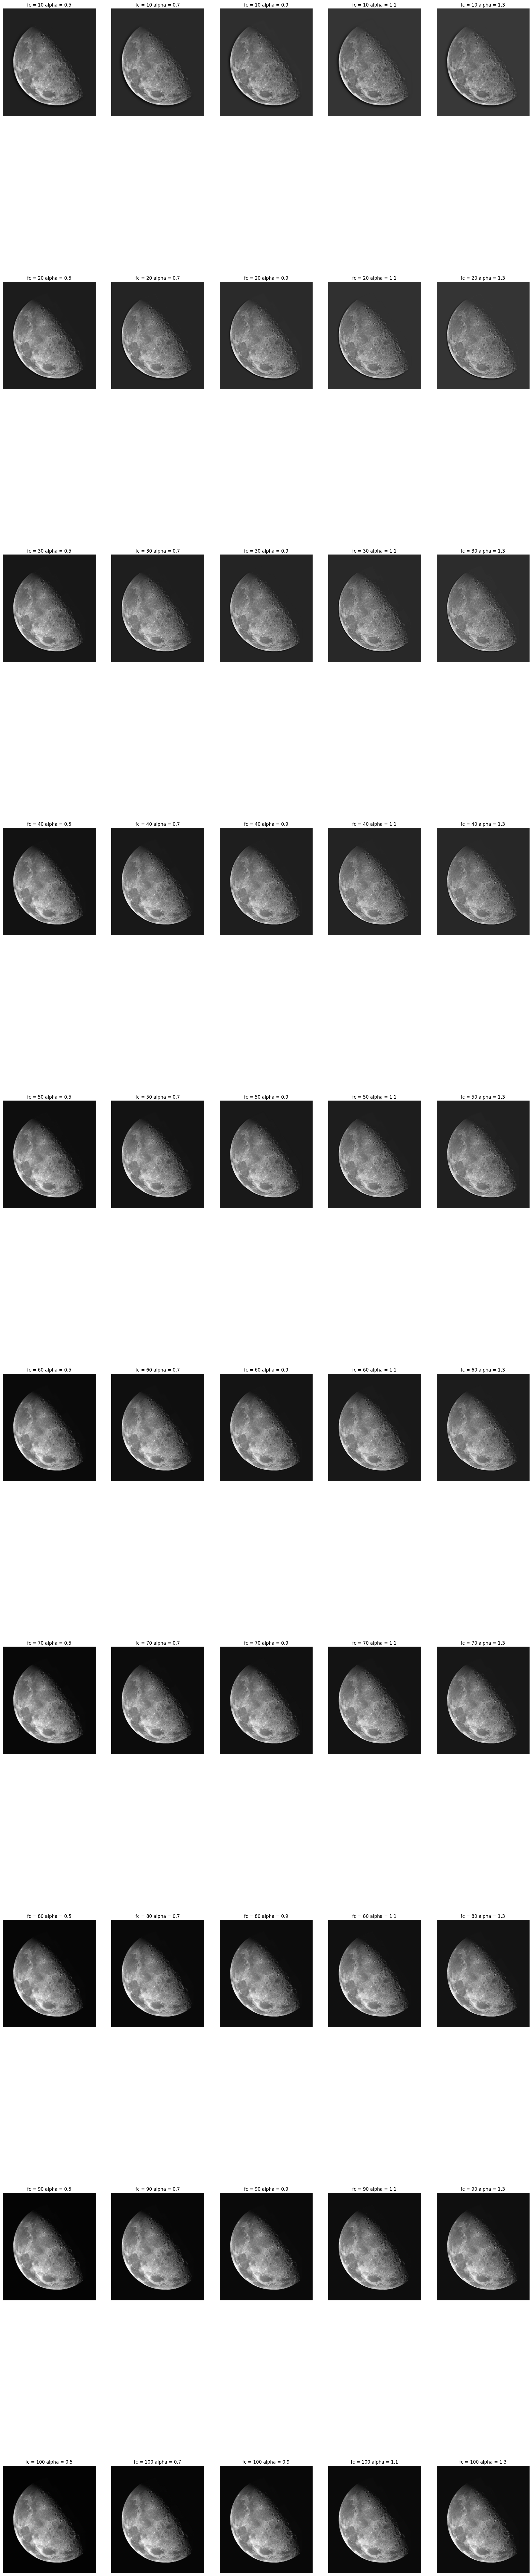

In [9]:
# Inscrivez votre code ici

luneIm = imread("Lune2.tif")
fig, ax = plt.subplots(10,5, figsize=(20,100))
fig.tight_layout()


for row in range(10):
    for column in range(5):
        
        fc = 10 +10*row
        alpha = 0.5 + 0.2*column 
        luneIm_pb = luneIm + alpha*(luneIm - filtpb_gauss(luneIm, fc))
        
        
        ax[row,column].set_title(f"fc = {fc} alpha = {alpha}")
        ax[row,column].imshow(luneIm_pb, cmap='gray')
        ax[row,column].axis('off')

<div class="alert alert-block alert-warning">
- Qu'observez-vous ?</div>

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE
</div>

<div class="alert alert-block alert-warning">

Utilisez le script <I>unsharp_filter.m</I>, qui met en œuvre le rehaussement par masquage 
flou dans le domaine spatial étudié lors du TP1, et appliquez le filtrage à l’image de la lune. 
Comparez les deux approches (spatiale & fréquentielle), en ce qui concerne tant la mise en 
œuvre que les résultats. 
</div>

In [10]:
# On utilise à titre d'exemple l'image filtre gaussian (Low-Pass Filter)
def unsharp_filter(img, taille_masque, coefficient_de_rehaussement):
    """ Rehaussement par masquage par flou dans le domaine spatial
    
    img (ndarray): Image d'entrée
    taille_masque (int): Taille du masque gaussien
    coefficient_de_rehaussement (float): a dans la formule du masquage par flou G = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ] 
    """
    a = coefficient_de_rehaussement
    Fprime = cv2.blur(img, (taille_masque, taille_masque))
    norm_Fprime = Fprime / np.max(Fprime)
    return img + a * (img - norm_Fprime)

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE
</div>

### 2.2. Rehaussement par Laplacien (4 pts) 
<div class="alert alert-block alert-warning">


Mettez en œuvre le rehaussement par Laplacien dans le domaine spectral en programmant directement la forme donnée en cours.Il peut être implémenté à l’aide de l’équation suivante:

\begin{equation*}
\triangledown^2I(x,y)\xrightarrow{\text{F}}-4\pi^2D^2(u,v)\bullet I_F(u,v)
\end{equation*}

Où  $𝐼_𝐹 (𝑢, 𝑣)$  est la représentation fréquentielle avec fréquence centrée de l’image  $𝐼(𝑥, 𝑦)$  et  $𝐷^2 (𝑢, 𝑣)$ la distance euclidienne au carrée entre les fréquences  $(𝑢, 𝑣)$  et la fréquence centrale. Cette formulation est équivalente à la forme spatiale du filtre Laplacien en raison 
de la théorie de convolution de la transformée de Fourier. Pour plus de détails, consulter les diapositives du cours 4. 
    
Vous pouvez vous inspirez du code des fonctions `filtpb_gauss` et `filtpb_butter` pour vous aider.
</div>

In [11]:
# Inscrivez votre code ici

<div class="alert alert-block alert-warning">
Mettez ensuite en œuvre le rehaussement par Laplacien dans le 
domaine spatial. Il peut être implémenté à l’aide des noyaux de convolution suivants : 
    
<center>  </center>

$$
\left[\begin{array}{ccc} 
0 &1 &0\\
1 &-4 &1\\
0 &1 &0\;
\end{array}\right]\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\left[\begin{array}{ccc} 
1 &1 &1\\
1 &-8 &1\\
1 &1 &1
\end{array}\right]
$$ 
    
Pour rehausser les contours dans le domaine spatial, le Laplacien doit être soustrait à l'image originale:
$I_{rehaussée} = I_{original} - I_{original} * noyau_{laplacien} $
    
Pour mieux visualiser l'effet du filtre laplacien, vous pouvez ajouter les paramètres `vmin=0` et `vmax=1` à la fonction plt.imshow pour obtenir l'affichage entre ces valeurs.
</div>
    


In [12]:
# Inscrivez votre code ici


<div class="alert alert-block alert-warning">



- Comparez les deux approches (spatial et spectral), en ce qui concerne tant la mise en œuvre que les résultats.
    
</div>

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE
</div>

In [13]:
# Inscrivez votre code ici

<div class="alert alert-block alert-warning">



- Enfin, comparez le rehaussement par Laplacien et le rehaussement par masquage flou. 
    
</div>

In [14]:
# Inscrivez votre code ici

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE
</div>

## 3. Détramage par réjection de fréquences (7 pts)
On a vu à la question 1 que la représentation fréquentielle de certaines images comporte 
des « points brillants » que l’on peut associer à des trames qui dégradent l’image de départ. 
L’amélioration de telles images peut donc être obtenue en éliminant ces points brillants, ce 
qui correspond à la réjection de « zones fréquentielles » situées autour des points brillants. 
Cette question a pour but de mettre en œuvre un tel filtrage.

<div class="alert alert-block alert-warning">


Développez une fonction permettant de filtrer les fréquences correspondantes aux points brillants. Attention, le centre du spectre de Fourier correspond à la fréquence moyenne de l'image.
    
</div>

In [15]:
# Inscrivez votre code ici

<div class="alert alert-block alert-warning">



- Commentez les résultats obtenus. 
   
</div>

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE
</div>